![jupyter](./tasks/task3.png)
![jupyter](./tasks/task3-var-1.png)
![jupyter](./tasks/task3-var-2.png)

In [208]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sb
from prettytable import PrettyTable
from scipy.stats import chi2

np.set_printoptions(precision=3, suppress=True)

def print_table(th, td):
    table = PrettyTable(th)
    columns = len(th) 
    td_data = td.tolist()[:]
    while td_data:
        table.add_row(td_data[:columns])
        td_data = td_data[columns:]
    print(table)
    
n = 120

$Плотность \spaceи\space функция\space распределения \spaceхи-квадрат\space$

![jupyter](./pictures/p_chi2.png)
![jupyter](./pictures/F_chi2.png)

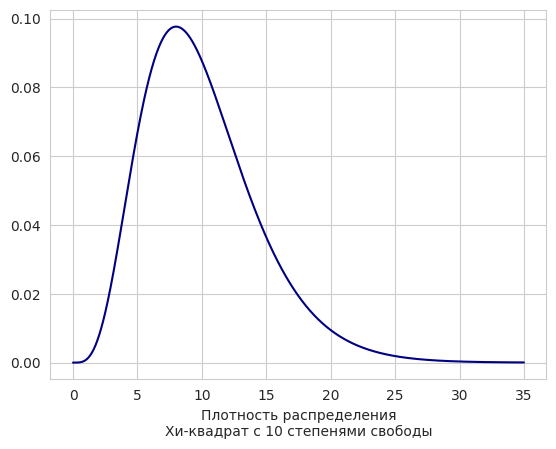

In [239]:
x = np.arange(0, 35, 0.001)
p_chi2 = chi2.pdf(x, df=10)
F = chi2.cdf(x, df=10)

sb.set_style("whitegrid")
plt.plot(x, p_chi2, color='navy')
plt.xlabel('Плотность распределения\nХи-квадрат с 10 степенями свободы')
plt.show()

In [274]:
Y = np.array([])
for i in range(n):
    Y = np.append(Y, random.random())

X = np.array([])
for i in range(n):
    X = np.append(X, chi2.ppf(Y[i], df=10))
print("Смоделированный массив X =")
print(X)

Смоделированный массив X =
[ 8.163 10.956 11.418  2.773 10.279  6.564  8.498  9.683  3.523 13.659
 12.969  5.222  5.059 14.367 12.575  5.583 16.238 16.167 11.764 15.212
  5.582 11.025 16.176 17.89   8.655 11.341  5.818  9.665  4.068 11.097
 21.936  3.628  7.53   9.36   6.951  8.413  8.762  7.083 10.102  5.301
 12.389  5.686  6.645  5.1   10.216  5.828 14.595  7.089 10.901  6.314
 12.263 13.278 14.008 10.772 11.386  8.094  9.213 13.448  9.624  3.467
  7.196 10.888 11.736  7.906 10.12   7.074  5.16   9.058  8.682  6.966
  3.799 14.722  3.827  6.395 23.464 11.286 16.388  4.981 18.803  6.915
 17.769 14.767  6.347 20.533 13.35   8.468  5.277  8.398  8.472  8.194
  8.362  5.587  7.453 12.962 18.268 14.253 22.933  9.481 10.197  8.225
  6.347 13.363  6.919  7.478  6.609  4.599 13.614 10.904 13.765 12.179
  1.63   9.408 15.658  5.478 10.81  16.861  8.733 11.784  5.907 14.385]


In [275]:
Max = np.amax(X)
Min = np.amin(X)
w = Max - Min

print("Находим крайние члены вариационного ряда и размах выборки\n")
print("Размер n = %d\nКрайние члены вариационного ряда max = %.3f, min = %.5f\nРазмах выборки w = %f" 
      %(n, Max, Min, w))

Находим крайние члены вариационного ряда и размах выборки

Размер n = 120
Крайние члены вариационного ряда max = 23.464, min = 1.63043
Размах выборки w = 21.833188


In [276]:
l = math.trunc(1 + math.log2(n))
h = w / l

print("Осуществляем группировку данных\n")

print("Число интервалов l = %d\nШаг(ширина интервалов группировки) h = %f" %(l, h))

hist, bin_edges = np.histogram(X, l)
bin_edges_average = np.zeros(bin_edges[:7].size)
for i in range (l):
    bin_edges_average[i] = (bin_edges[i] + bin_edges[i + 1]) / 2 
f1 = bin_edges_average
f2 = hist

print("\n")
th = ["Cредние значения каждого из  интервалов", "Частоты попадания элементов в каждый из интервалов"]
td = np.array(f1[0])
for i in range(len(f1)-1):
    td = np.append(td, f2[i])
    td = np.append(td, f1[i+1])
td = np.append(td, f2[6])
print_table(th, td)

p = hist / n

Int = f1
intl = Int - h / 2
intl = np.append(intl, Max)

print("\n")
th = ["Интервал", "Середина интервала int", "Частота f2", "Относительная частота p"]
td = []
for i in range(l):
    td.append("["+str(round(intl[i], 4))+","+str(round(intl[i + 1], 4))+")")
    td.append(round(Int[i], 4))
    td.append(f2[i])
    td.append(round(p[i], 4))
print_table(th, np.array(td))

Осуществляем группировку данных

Число интервалов l = 7
Шаг(ширина интервалов группировки) h = 3.119027


+-----------------------------------------+----------------------------------------------------+
| Cредние значения каждого из  интервалов | Частоты попадания элементов в каждый из интервалов |
+-----------------------------------------+----------------------------------------------------+
|            3.1899421760062827           |                        9.0                         |
|            6.308969049080712            |                        33.0                        |
|            9.427995922155143            |                        34.0                        |
|            12.547022795229573           |                        23.0                        |
|            15.666049668304002           |                        13.0                        |
|            18.78507654137843            |                        4.0                         |
|            21.90410

По сгруппированным данным строим гистограмму относительных частот



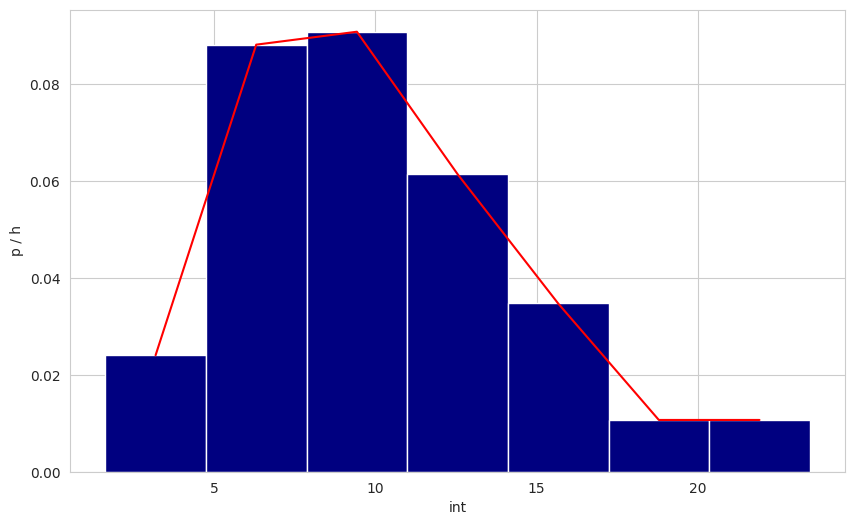

In [277]:
print("По сгруппированным данным строим гистограмму относительных частот\n")

sb.set_style("whitegrid")
plt.figure(figsize=(10,6))
xx = Int
yy = p / h
plt.bar(xx, yy, width=h, color='navy')
plt.plot(xx, yy, color='red')
plt.xlabel("int")
plt.ylabel("p / h")
plt.show()

In [278]:
print("Вычисляем выборочное среднее и выборочную дисперсию\n")

xm = sum(X) / n
s2 = sum((X[i] - xm) ** 2 for i in range(n)) / (n - 1)
print("Выброчное среднее xm =", round(xm, 5))
print("Выборочная дисперсия s2 =", round(s2, 5))

Вычисляем выборочное среднее и выборочную дисперсию

Выброчное среднее xm = 10.0205
Выборочная дисперсия s2 = 19.68121


Строим совмещенные графики гистограммы и плотности предполагаемого закона



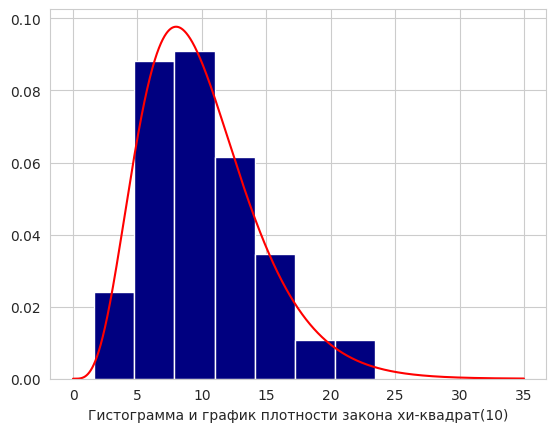

In [279]:
print("Строим совмещенные графики гистограммы и плотности предполагаемого закона\n")

sb.set_style("whitegrid")
plt.plot(x, p_chi2, color='red')
plt.xlabel('Гистограмма и график плотности закона хи-квадрат(10)')
xx = Int
yy = p / h
plt.bar(xx, yy, width=h, color='navy')
plt.show()

![jupyter](./pictures/E-chi2.png)
![jupyter](./pictures/Var-chi2.png)

In [280]:
th = ["Мат. ожидание (M)", "Эмпирическое среднее (xm)", "Сравнение(M - xm = 0)мало"]
td = np.array([10, round(xm, 5), 10 - xm])
print_table(th, td)

th = ["Дисперсия (D)", "Выборочная дисперсия (s2)", "Сравнение(D / s2 = 1.388)дисперсии близки"]
td = np.array([20, round(s2, 5), 20 / s2])
print_table(th, td)

+-------------------+---------------------------+---------------------------+
| Мат. ожидание (M) | Эмпирическое среднее (xm) | Сравнение(M - xm = 0)мало |
+-------------------+---------------------------+---------------------------+
|        10.0       |          10.0205          |   -0.020501004330126804   |
+-------------------+---------------------------+---------------------------+
+---------------+---------------------------+-------------------------------------------+
| Дисперсия (D) | Выборочная дисперсия (s2) | Сравнение(D / s2 = 1.388)дисперсии близки |
+---------------+---------------------------+-------------------------------------------+
|      20.0     |          19.68121         |             1.016197821720774             |
+---------------+---------------------------+-------------------------------------------+


In [281]:
def ind(x):
    if (x > 0):
        return 1
    return 0

def Femp(x):
    res = []
    for x_i in x:
        res.append(sum(p[i] * ind(x_i - Int[i]) for i in range(l)))
    return res

hama = 0.1
eps = math.sqrt(-1/(2 * n) * math.log(hama / 2))

def R(x):
    res = []
    for fx in Femp(x):
        if fx + eps < 1:
            res.append(fx + eps)
        else: 
            res.append(1)
    return res

def L(x):
    res = []
    for fx in Femp(x):
        if fx - eps > 0:
            res.append(fx - eps)
        else: 
            res.append(0)
    return res

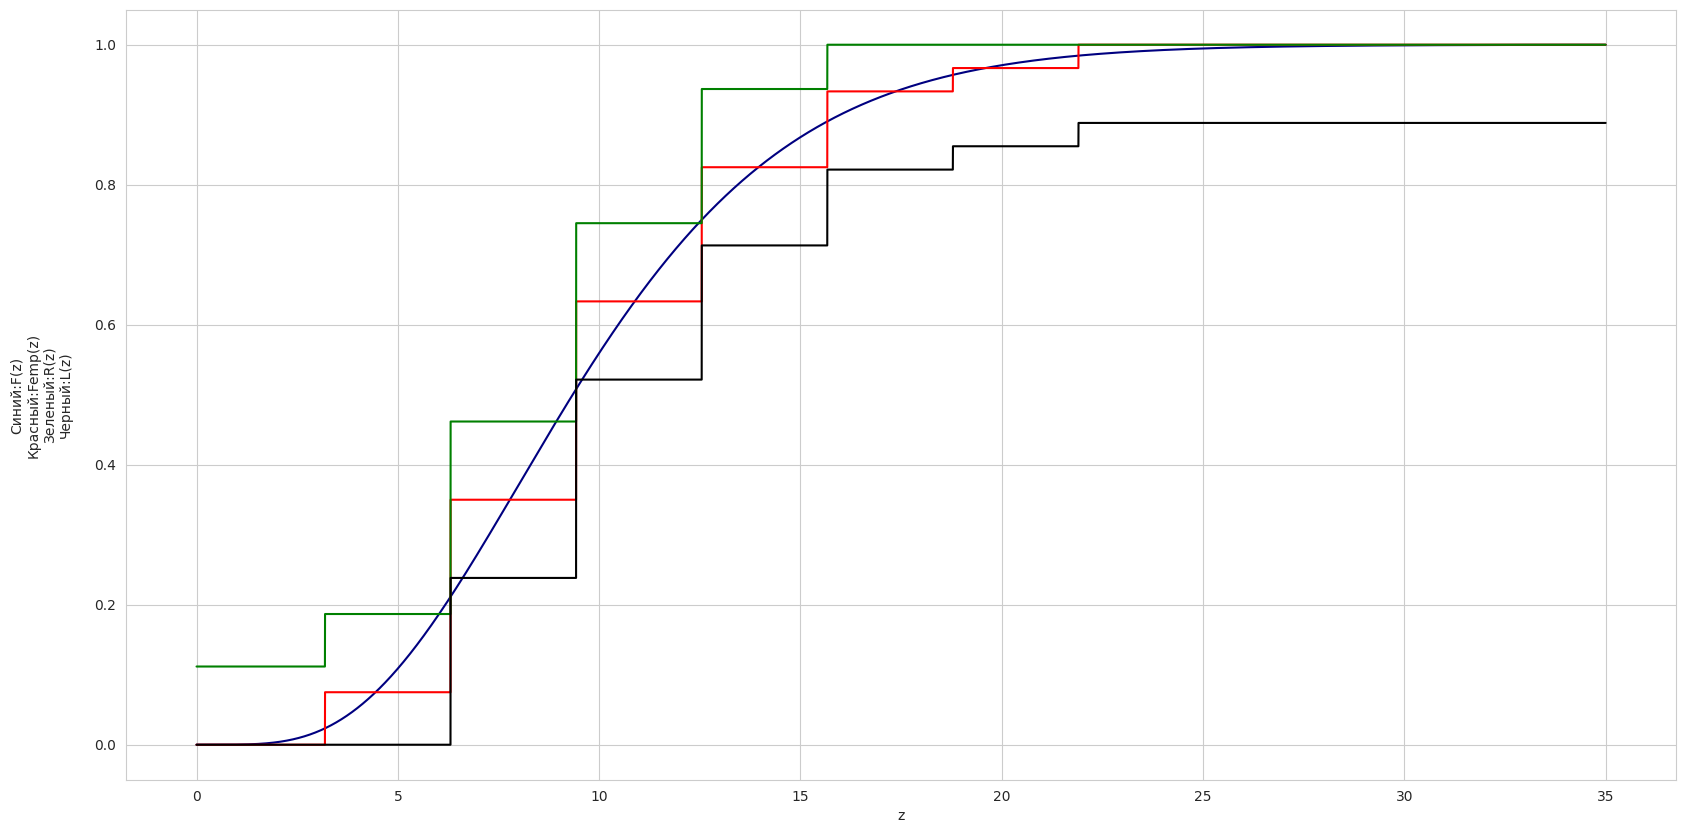

In [282]:
sb.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(x, F, color='navy')
plt.plot(x, Femp(x), color='red')
plt.plot(x, R(x), color='green')
plt.plot(x, L(x), color='black')
plt.xlabel("z")
plt.ylabel("Синий:F(z)\nКрасный:Femp(z)\nЗеленый:R(z)\nЧерный:L(z)\n")
plt.show()